In [ ]:
Домашнее задание
http://prntscr.com/umci7o

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_iris
data = load_iris()

In [19]:
y = data.target

In [14]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [16]:
df = df[['sepal length (cm)', 'sepal width (cm)']]

In [17]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
lda = LinearDiscriminantAnalysis()

In [23]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
y_predict = lda.predict(X_test)

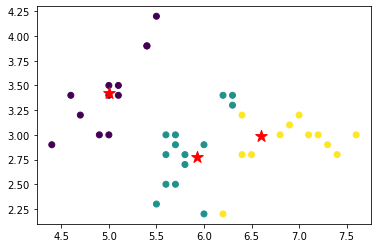

In [30]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_predict)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_scaled = scaler.fit_transform(df)

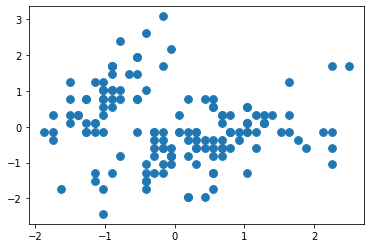

In [41]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [42]:
from sklearn.cluster import KMeans

In [43]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

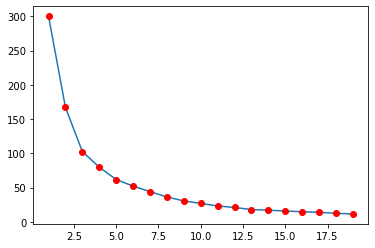

In [45]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [46]:
clf_kmeans = KMeans(n_clusters=3)
clusters_kmeans = clf_kmeans.fit_predict(X_scaled)

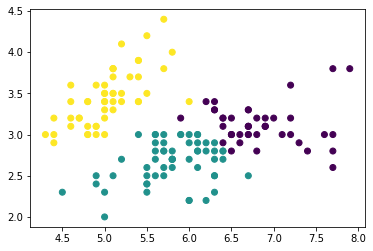

In [48]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=clusters_kmeans)

plt.show()